In [2]:
import pandas as pd
import re
import sklearn.neighbors as nb
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder as LB
import sklearn.model_selection as cv
import sklearn
from sklearn import preprocessing
import random as rand
import numpy as np
import math

# Loading data 

In [3]:
data = pd.read_csv('games_clean.csv')
data

,Presence,Memory,ReleaseDate,OriginalCost,DiscountedCost,Achievements,Storage,RatingsBreakdown-Recommended,RatingsBreakdown-Meh,RatingsBreakdown-Exceptional,...,Wargame,Warhammer 40K,Werewolves,Western,Word Game,World War I,World War II,Wrestling,Zombies,eSports
0,41.0,2000.0,2017.0,5.99,0.0,0.0,450.0,2.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
1,25415.0,1000.0,2012.0,3.99,0.0,44.0,120.0,4.0,9.0,1.0,...,False,False,False,False,False,False,False,False,False,False
2,1421.0,4000.0,2016.0,1.99,0.0,0.0,2000.0,2.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
3,257.0,4000.0,2013.0,9.99,0.0,20.0,12000.0,2.0,2.0,1.0,...,False,False,False,False,False,False,False,False,False,False
4,250.0,256.0,2017.0,4.99,0.0,0.0,312.0,2.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,259.0,1024.0,2017.0,0.00,0.0,100.0,200.0,3.0,3.0,1.0,...,False,False,False,False,False,False,False,False,False,False
2196,1797.0,8000.0,2017.0,5.99,0.0,13.0,1000.0,32.0,8.0,4.0,...,False,False,False,False,False,False,False,False,False,False
2197,133.0,1000.0,2018.0,6.99,0.0,0.0,1000.0,1.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
2198,12.0,8000.0,2018.0,0.00,0.0,0.0,4000.0,3.0,2.0,1.0,...,False,False,False,False,False,False,False,False,False,False


In [4]:
LE = LB()
class_names = data['Metacritic'].unique()
data.loc[:, 'Metacritic'] = LE.fit_transform(data['Metacritic'])

In [5]:
# Let's separate Data from labels

X = data.drop(['Metacritic'],axis=1)   # Data
y = data['Metacritic']

print(X.shape)
print(y.shape)

(2200, 439)
(2200,)


# KNN without scaled data

In [17]:
# Let's do a simple cross-validation: split data into training and test sets (test 30% of data)
(X_train, X_test,  y_train, y_test) = cv.train_test_split(X, y, test_size=.3, random_state=1)

# Create a kNN classifier object
knc = nb.KNeighborsClassifier()

# Train the classifier
knc.fit(X_train, y_train)

# Obtain accuracy score of learned classifier on test data
print(knc.score(X_test, y_test))

0.2878787878787879


In [6]:
# More information with confussion matrix
from sklearn.metrics import confusion_matrix

y_pred = knc.predict(X_test)
print(sklearn.metrics.confusion_matrix(y_test, y_pred))

[[64 47 35 21]
 [55 39 39 23]
 [57 42 48 26]
 [37 35 53 39]]


In [7]:
# Obtain Recall, Precision and F-Measure for each class
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.30      0.38      0.34       167
           1       0.24      0.25      0.24       156
           2       0.27      0.28      0.28       173
           3       0.36      0.24      0.29       164

    accuracy                           0.29       660
   macro avg       0.29      0.29      0.29       660
weighted avg       0.29      0.29      0.29       660



# Normalize data

In [6]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_scaled = pd.DataFrame(min_max_scaler.fit_transform(X), columns = X.columns)
X_scaled

,Presence,Memory,ReleaseDate,OriginalCost,DiscountedCost,Achievements,Storage,RatingsBreakdown-Recommended,RatingsBreakdown-Meh,RatingsBreakdown-Exceptional,...,Wargame,Warhammer 40K,Werewolves,Western,Word Game,World War I,World War II,Wrestling,Zombies,eSports
0,0.000051,0.000336,0.823529,0.133111,0.0,0.000000,0.008785,0.005618,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.031815,0.000168,0.529412,0.088667,0.0,0.063309,0.002314,0.016854,0.121212,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.001779,0.000672,0.764706,0.044222,0.0,0.000000,0.039178,0.005618,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000322,0.000672,0.588235,0.222000,0.0,0.028777,0.235264,0.005618,0.015152,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000313,0.000043,0.823529,0.110889,0.0,0.000000,0.006079,0.005618,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,0.000324,0.000172,0.823529,0.000000,0.0,0.143885,0.003883,0.011236,0.030303,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2196,0.002250,0.001344,0.823529,0.133111,0.0,0.018705,0.019569,0.174157,0.106061,0.015152,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2197,0.000166,0.000168,0.882353,0.155333,0.0,0.000000,0.019569,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2198,0.000015,0.001344,0.882353,0.000000,0.0,0.000000,0.078395,0.011236,0.015152,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# KNN with scaled data

In [11]:
# Let's do a simple cross-validation: split data into training and test sets (test 30% of data)
(X_train, X_test,  y_train, y_test) = cv.train_test_split(X_scaled, y, test_size=.3, random_state=1)

# Create a kNN classifier object
knc = nb.KNeighborsClassifier()

# Train the classifier
knc.fit(X_train, y_train)

# Obtain accuracy score of learned classifier on test data
print(knc.score(X_test, y_test))

0.3287878787878788


In [10]:
# More information with confussion matrix
from sklearn.metrics import confusion_matrix

y_pred = knc.predict(X_test)
print(sklearn.metrics.confusion_matrix(y_test, y_pred))

[[77 31 23 36]
 [53 45 30 28]
 [68 37 44 24]
 [47 37 29 51]]


In [11]:
# Obtain Recall, Precision and F-Measure for each class
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.31      0.46      0.37       167
           1       0.30      0.29      0.29       156
           2       0.35      0.25      0.29       173
           3       0.37      0.31      0.34       164

    accuracy                           0.33       660
   macro avg       0.33      0.33      0.32       660
weighted avg       0.33      0.33      0.32       660



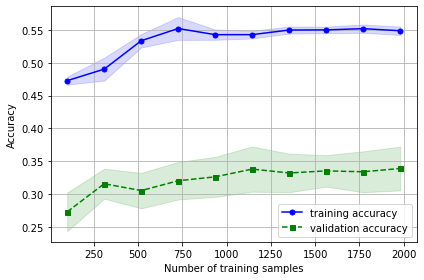

In [12]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=nb.KNeighborsClassifier(n_neighbors=5),
                               X=X_scaled,
                               y=y,
                               train_sizes=np.linspace(0.05, 1.0, 10),
                               cv=10,
                               n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid(True)
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('learning_curve.png', dpi=600)
plt.show()

# Selecting the best K and best distance method

In [13]:
from sklearn.model_selection import cross_val_score  
from sklearn.model_selection import cross_val_predict  
from sklearn.metrics import accuracy_score

# Results with different parameters: k
cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=1), X=X_scaled, y=y,  cv=10)  
print("Accuracy 1 neighbour and uniform weighting:", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=3), X=X_scaled, y=y,  cv=10)  
print("Accuracy 3 neighbour and uniform weighting:", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=5), X=X_scaled, y=y,  cv=10)  
print("Accuracy 5 neighbour and uniform weighting:", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=7), X=X_scaled, y=y,  cv=10)  
print("Accuracy 7 neighbour and uniform weighting:", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=9), X=X_scaled, y=y,  cv=10) 
print("Accuracy 9 neighbour and uniform weighting:", np.mean(cv_scores))

Accuracy 1 neighbour and uniform weighting: 0.33999999999999997
Accuracy 3 neighbour and uniform weighting: 0.34500000000000003
Accuracy 5 neighbour and uniform weighting: 0.3390909090909091
Accuracy 7 neighbour and uniform weighting: 0.35045454545454546
Accuracy 9 neighbour and uniform weighting: 0.3472727272727273


In [14]:
# Results with different parameters: k and distance weighting
cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=1,weights='distance'), X=X_scaled, y=y,  cv=10)  
print("Accuracy 1 neighbour and distance weighting:", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=3,weights='distance'), X=X_scaled, y=y,  cv=10)  
print("Accuracy 3 neighbour and distance weighting:", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=5,weights='distance'), X=X_scaled, y=y,  cv=10)  
print("Accuracy 5 neighbour and distance weighting:", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=7,weights='distance'), X=X_scaled, y=y,  cv=10)  
print("Accuracy 7 neighbour and distance weighting:", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=9,weights='distance'), X=X_scaled, y=y,  cv=10)  
print("Accuracy 9 neighbour and distance weighting:", np.mean(cv_scores))

Accuracy 1 neighbour and distance weighting: 0.33999999999999997
Accuracy 3 neighbour and distance weighting: 0.3545454545454546
Accuracy 5 neighbour and distance weighting: 0.3445454545454546
Accuracy 7 neighbour and distance weighting: 0.3581818181818182
Accuracy 9 neighbour and distance weighting: 0.35590909090909095


# Authomatically find best parameters

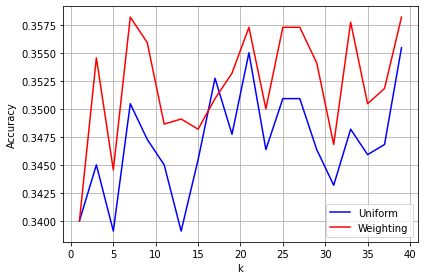

In [24]:
lr = []
for ki in range(1,40,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki), X=X_scaled, y=y, cv=10)
    lr.append(np.mean(cv_scores))
plt.plot(range(1,40,2),lr,'b',label='Uniform')

lr = []
for ki in range(1,40,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki,weights='distance'), X=X_scaled, y=y, cv=10)
    lr.append(np.mean(cv_scores))
plt.plot(range(1,40,2),lr,'r',label='Weighting')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()

plt.show()

# Grid Search method

In [23]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':list(range(1,40,2)), 'weights':('distance','uniform')}
knc = nb.KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params,cv=10,n_jobs=-1)  # If cv is integer, by default is Stratifyed 
clf.fit(X_scaled, y)
print("Best Params=",clf.best_params_, "Accuracy=", clf.best_score_)

Best Params= {'n_neighbors': 7, 'weights': 'distance'} Accuracy= 0.3581818181818182


# Feature Selection

In [28]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X_scaled, y)
thresholds=clf.feature_importances_
print(thresholds.min())
print(thresholds.max())
thresholds

3.3984889494254835e-06
0.0812656534852907


array([5.59318061e-02, 3.63211377e-02, 8.12656535e-02, 4.70808407e-02,
       2.61452623e-03, 2.62847428e-02, 4.81282719e-02, 2.79379043e-02,
       2.27236761e-02, 2.15796116e-02, 2.51770895e-02, 2.34099672e-02,
       1.91695602e-02, 2.85223545e-04, 6.97133371e-04, 2.41933651e-04,
       4.72839929e-04, 5.73068224e-03, 5.19249992e-04, 8.96085878e-04,
       1.32253820e-03, 5.38800852e-05, 1.76805855e-03, 2.04730268e-04,
       1.42852806e-03, 6.28836290e-04, 4.14467121e-04, 6.56106795e-05,
       8.79165271e-04, 1.21593556e-02, 1.09439122e-03, 8.61111106e-04,
       1.14984462e-03, 1.26660129e-03, 1.28190749e-02, 8.01749302e-04,
       7.01179300e-04, 4.07465458e-04, 5.94551458e-05, 1.28304379e-04,
       4.84364439e-03, 1.25294576e-03, 4.07496829e-03, 9.39170563e-05,
       7.02227691e-04, 1.00650375e-04, 2.14207252e-04, 1.90443612e-04,
       4.78319392e-03, 7.84730160e-05, 1.47403054e-04, 1.15602741e-03,
       1.02310601e-03, 2.16555770e-04, 2.03780323e-04, 3.48420374e-04,
      

In [135]:
from sklearn.model_selection import cross_val_score 
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(clf, prefit=True, threshold=(np.array(thresholds).mean()))
X_new = model.transform(X_scaled)
print(X_new.shape)
print('Original: ', np.mean(cross_val_score(nb.KNeighborsClassifier(n_neighbors=7, weights='distance'), X=X_scaled, y=y, cv=10, scoring='accuracy')))
print('With first approach of FS:', np.mean(cross_val_score(nb.KNeighborsClassifier(n_neighbors=7, weights='distance'), X=X_new, y=y, cv=10, scoring='accuracy')))

(2200, 86)
Original:  0.3581818181818182
With first approach of FS: 0.36


In [130]:
s_thresholds = np.sort(thresholds)[::-1][:200]
s_thresholds

array([0.08126565, 0.05593181, 0.04812827, 0.04708084, 0.03632114,
       0.0279379 , 0.02628474, 0.02517709, 0.02340997, 0.02272368,
       0.02157961, 0.01916956, 0.01302845, 0.01281907, 0.01215936,
       0.01039082, 0.00975205, 0.00804493, 0.00795445, 0.00777445,
       0.00757577, 0.00723952, 0.00695297, 0.00684646, 0.00668358,
       0.00657975, 0.00653765, 0.00600759, 0.0057868 , 0.00573068,
       0.0056866 , 0.00521263, 0.00509612, 0.00497987, 0.00495558,
       0.00484364, 0.00481336, 0.00478319, 0.00469532, 0.00456196,
       0.00450256, 0.00444255, 0.00442752, 0.00432823, 0.00410965,
       0.00409855, 0.00407497, 0.00402598, 0.00386263, 0.00379599,
       0.00374983, 0.00372276, 0.00366358, 0.00363982, 0.00360538,
       0.00357141, 0.00335148, 0.00330537, 0.0033027 , 0.00324835,
       0.0032345 , 0.003216  , 0.00314745, 0.00314366, 0.00310327,
       0.00306716, 0.00304622, 0.0029295 , 0.00289124, 0.00275306,
       0.00271732, 0.00267541, 0.00263899, 0.00262477, 0.00262

In [131]:
from sklearn.model_selection import GridSearchCV
l=[]
lparval=[]
for threshold in s_thresholds:
    model = SelectFromModel(clf, prefit=True, threshold=threshold)
    X_new = model.transform(X_train)
    params = {'n_neighbors':range(1,30,2), 'weights':('distance','uniform')}
    knc = nb.KNeighborsClassifier()
    clf2 = GridSearchCV(knc, param_grid=params,cv=5,n_jobs=-1)  # If cv is integer, by default is Stratifyed 
    clf2.fit(X_new, y_train)
    parval=clf2.best_params_
    acc = clf2.best_score_
    l.append(acc)
    lparval.append(parval)

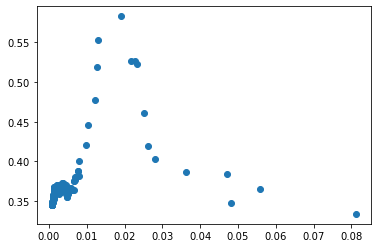

Best threshold:  0.019169560199166526
Best params for this threshold= {'n_neighbors': 5, 'weights': 'distance'}


In [132]:
import matplotlib.pyplot as plt

plt.scatter(s_thresholds,l)
plt.show()

print('Best threshold: ',s_thresholds[np.argmax(l)])
print("Best params for this threshold=",lparval[np.argmax(l)])

In [137]:
parval=lparval[np.argmax(l)]
model = SelectFromModel(clf, prefit=True, threshold=thresholds[np.argmax(l)])
X_new = model.transform(X_test)
print(X_new.shape)
clf_new = nb.KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])
print('Original: ', np.mean(cross_val_score(nb.KNeighborsClassifier(n_neighbors=7, weights='distance'), X=X_test, y=y_test, cv=10, scoring='accuracy')))
print('With FS: ', np.mean(cross_val_score(clf_new, X=X_new, y=y_test, cv=10, scoring='accuracy')))

(660, 9)
Original:  0.3272727272727273
With FS:  0.5


In [138]:
X_new = model.transform(X_scaled)
print(X_new.shape)
print('Original: ', np.mean(cross_val_score(nb.KNeighborsClassifier(n_neighbors=7, weights='distance'), X=X_scaled, y=y, cv=10, scoring='accuracy')))
print('With FS: ', np.mean(cross_val_score(clf_new, X=X_new, y=y, cv=10, scoring='accuracy')))

(2200, 9)
Original:  0.3581818181818182
With FS:  0.5604545454545453


In [120]:
for i in range(0, len(model.get_support())):
    if model.get_support()[i]:
        print(X.columns[i])

Presence
Memory
ReleaseDate
OriginalCost
Achievements
Storage
RatingsBreakdown-Recommended
RatingsBreakdown-Skip
Controller
